# From footprints to photos: Collecting aerial images via PDOK

## 📌 Overview
In this tutorial, you will learn how to collect aerial photos based on publicly available geographical information and you will create a customized aerial imagery dataset.

More specifically, you will automatically extract aerial imagery from building footprints and corresponding geographical information. Later on in the course, you will compute meaningful building aerial image features via pre-trained computer vision foundation models. Following the process, you will be able to interpret whether your machine can spot (dis)similar buildings. How exciting!

<center>
<img src="https://drive.google.com/uc?export=view&id=1qP0HjBmP3h0MGwPZa-jcQ8XdL7Uk7SeX" alt="floor-layout" class="center" width="750px">
</center>

### 🧠 **Learning objectives**
- Visualize and interpret *building+context* representations
- Automatically collect aerial images and create a customized dataset
- Locate building footprints from geographical information

### 🐍 **New in Python**
- Dictionaries (reminder): `dict`
- JSON and pickle imports/exports: `json`
- Library for image processing (Pillow): `PIL`
- Torch tensors: `torch`
- HTTP requests: `requests`

### 🌍 1. Building footprint
- **Geopandas**: Recall what you learned in Tutorial 2.
- **3D BAG**: Discover an extensive database of buildings in the Netherlands.

### 📸 2. Aerial images
- **GIS skills**: Acquire hands-on experience on spatial data analysis.
- **Boundary definition**: Learn to define geographic boundaries for image collection.
- **Image extraction**: Master the skill of extracting images automatically within set boundaries.

### 🎨 3. Image Representation
- In the next episode...

### 💻 Assignment
- **Hands-on project**: Leverage what you have learned and collect your own dataset with aerial images from a neighborhood in Delft.

## Building footprints

### Directory and file management
Let's set up the working path as explained in [Tutorial 2](https://github.com/AiDAPT-A/2024-Q3-ai-in-architecture/blob/main/tutorials/2_from_3D_to_2D.ipynb). Feel free to create and use a specific folder of your choice.

In [ ]:
# import drive and os libraries
from google.colab import drive
import os

# mount google drive
drive.mount('/content/drive', force_remount=True)

# directory where the file are/will be stored
working_path = "/content/drive/MyDrive/voorhof_class"

# using chdir to change the directory
os.chdir(working_path)

Mounted at /content/drive


In [ ]:
# Hmmm, where are we?
os.getcwd()

'/content/drive/MyDrive/voorhof_class'

### Buildings footprint
So far, nothing really new. Let's get now into it! With 3D BAG, you can extract images from a region of your choice within the Netherlands. How cool is that?
For instance, you could select a specific tile and download the corresponding GeoPandas file from [3D BAG](https://3dbag.nl/en/download). Yes, you are guessing it right, go for the `.gpkg` file.
Since you are already GeoPandas expert, this task should still be very smooth.


In this tutorial, you will collect building images from *Voorhof*, a district in Delft. **You can find** the corresponding geopandas within this [shared folder](https://drive.google.com/drive/folders/1XEs7RnW3qymOrZRT7rObSYcL5TLVrhJl?usp=sharing).

The shared folder contains multiple files. For now, just download the following files and place them in your *Colab* working folder:

+ voorhof_bag.gpkg (building data)
+ voorhof_buurten.gpkg (Delft neighborhoods)

<center>
<img src="https://drive.google.com/uc?export=view&id=1uGp8bKEtj5HAVdR_ovawFi0Lecob5x_r" alt="floor-layout" class="center" width="450px">
</center>

In [ ]:
import geopandas as gpd

## Load GeoPandas file
path_to_data = "voorhof_bag.gpkg" # This should contain the name of the downloaded geopandas file
tile = gpd.read_file(path_to_data)
tile.head()

,b3_h_50p,b3_h_70p,b3_h_max,b3_h_min,b3_dd_id,identificatie,b3_pand_deel_id,b3_bag_bag_overlap,b3_n_vlakken,b3_pw_onvoldoende,...,oorspronkelijkbouwjaar,status,tijdstipeindregistratielv,tijdstipinactief,tijdstipinactieflv,tijdstipnietbaglv,tijdstipregistratie,tijdstipregistratielv,voorkomenidentificatie,geometry
0,23.994543,24.550222,27.146124,23.937897,0,NL.IMBAG.Pand.0503100000019293,0,0.0,3,false,...,1968.0,Pand in gebruik,None,None,None,None,2010-10-13T13:54:55Z,2010-10-13T14:01:47Z,1.0,"MULTIPOLYGON (((84065.93 445066.312, 84066.109..."
1,24.029894,24.787464,27.144640,23.944086,0,NL.IMBAG.Pand.0503100000019294,0,0.0,3,false,...,1968.0,Pand in gebruik,None,None,None,None,2010-10-13T13:54:55Z,2010-10-13T14:01:47Z,1.0,"MULTIPOLYGON (((84066.203 445065.969, 84066.10..."
2,23.921017,23.960238,27.491678,23.850100,0,NL.IMBAG.Pand.0503100000019295,0,0.0,4,false,...,1968.0,Pand in gebruik,None,None,None,None,2010-10-13T13:54:55Z,2010-10-13T14:01:47Z,1.0,"MULTIPOLYGON (((84077.133 445036.438, 84077.08..."
3,1.420376,1.438409,1.489682,1.357259,0,NL.IMBAG.Pand.0503100000011806,0,0.0,1,false,...,1966.0,Pand in gebruik,None,None,None,None,2010-10-13T13:41:07Z,2010-10-13T14:00:57Z,1.0,"MULTIPOLYGON (((83948.445 445049.125, 83944.57..."
4,4.005033,4.005245,4.005925,4.004161,0,NL.IMBAG.Pand.0503100000010260,0,0.0,1,false,...,1970.0,Pand in gebruik,None,None,None,None,2010-10-13T13:38:23Z,2010-10-13T14:00:48Z,1.0,"MULTIPOLYGON (((83986.594 444991.531, 83980.44..."


Do you know that all buildings in the Netherlands own a passport ID? Yes, that is right.
Let's check the passport ID corresponding to the first building our table:

In [ ]:
tile.iloc[0]['identificatie']

'NL.IMBAG.Pand.0503100000019293'

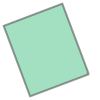

In [ ]:
tile.iloc[0].geometry

In [ ]:
print(tile.iloc[0].geometry)

MULTIPOLYGON (((84065.9297 445066.3125, 84066.1094 445066.375, 84060.625 445080.9688, 84048.4063 445076.3438, 84053.9063 445061.6563, 84065.9688 445066.1875, 84065.9297 445066.3125)))


From all available data, let's visualize plain footprints and classified by *dak_type* (roof type). If you are curious enough, BAG attributes are listed here in [Dutch](https://docs.3dbag.nl/nl/schema/attributes/).

<Figure size 1000x600 with 0 Axes>

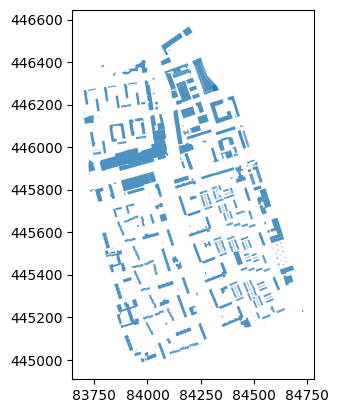

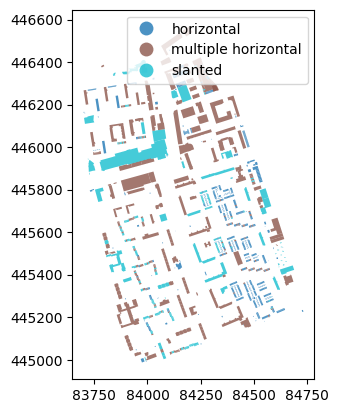

In [ ]:
# Plot buildings footprint

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
tile.plot(legend=True, alpha=0.8) # Plain footprint
tile.plot(column='b3_dak_type', legend=True, alpha=0.8) # Footprint roof type

plt.show()

You will narrow down your data collection to a specific neighborhood. In order to do that, let's take a look at the available neighborhood information.

In [ ]:
## Load GeoPandas file
path_to_data = "voorhof_buurten.gpkg" # This should contain the name of the downloaded geopandas file
buurten = gpd.read_file(path_to_data)
buurten.head()

,buurtcode,buurtnaam,wijkcode,gemeentecode,gemeentenaam,indelingswijzigingWijkenEnBuurten,water,meestVoorkomendePostcode,dekkingspercentage,omgevingsadressendichtheid,...,theaterGemiddeldAantalBinnen10Km,theaterGemiddeldAantalBinnen20Km,gemiddeldeAfstandTotMuseum,gemiddeldAantalMuseaBinnen5Km,gemiddeldAantalMuseaBinnen10Km,gemiddeldAantalMuseaBinnen20Km,jrstatcode,jaar,fuuid,geometry
0,BU05032400,Poptahof-Noord,WK050324,GM0503,Delft,1,NEE,2624,1,5122,...,5.8,48.0,2.4,5.0,8.0,58.0,2022BU05032400,2022,buurten.3687e68a-9351-420b-8d4d-0bdc229c329a,"MULTIPOLYGON (((83999.208 446464.25, 84005.463..."
1,BU05032401,Poptahof-Zuid,WK050324,GM0503,Delft,1,NEE,2624,1,4935,...,5.4,48.0,2.6,5.0,8.0,58.0,2022BU05032401,2022,buurten.2702f158-a6cd-4d75-b7d1-dcfe9969164f,"MULTIPOLYGON (((84095.27 446176.2, 84095.103 4..."
2,BU05032402,Bedrijventerrein Voorhof,WK050324,GM0503,Delft,1,NEE,2624,1,4932,...,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76,"MULTIPOLYGON (((84262.475 446574.717, 84268.76..."
3,BU05032403,Mythologiebuurt,WK050324,GM0503,Delft,1,NEE,2624,1,4726,...,5.9,48.0,2.2,5.0,8.0,58.0,2022BU05032403,2022,buurten.4bdc448f-60b7-4426-9ba8-6e31b9204583,"MULTIPOLYGON (((84429.923 446256.653, 84479.80..."
4,BU05032404,Aart van der Leeuwbuurt,WK050324,GM0503,Delft,1,NEE,2624,1,4383,...,4.6,48.0,3.1,5.0,8.0,58.9,2022BU05032404,2022,buurten.04a2ce90-d427-414c-b069-e29fcbdaa5a3,"MULTIPOLYGON (((83810.378 445759.786, 83831.66..."


<Figure size 1000x600 with 0 Axes>

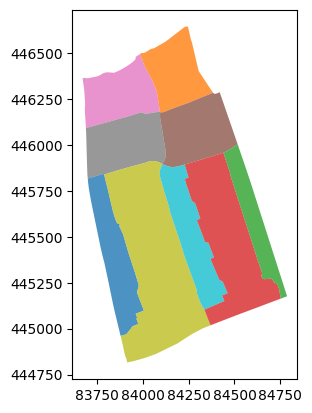

In [ ]:
# Plot buildings footprint
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
buurten.plot(column='buurtnaam', legend=False, alpha=0.8) # Neighborhood name
plt.show()

How many neighborhoods can we find in Voorhof? Let's check it out:

In [ ]:
buurten_names = buurten['buurtnaam'].unique()
print(buurten_names, len(buurten_names))

['Poptahof-Noord' 'Poptahof-Zuid' 'Bedrijventerrein Voorhof'
 'Mythologiebuurt' 'Aart van der Leeuwbuurt' 'Roland Holstbuurt'
 'Voorhof-Hoogbouw' 'Multatulibuurt' 'Bedrijventerrein Vulcanusweg'] 9


We will select `Bedrijventerrein Voorhof` in this tutorial. However, you can easily select another one if you have a preference.

In [ ]:
# Select a specific neighborhood by name (adjust column name if necessary)
selected_neighborhood = buurten[buurten["buurtnaam"] == "Bedrijventerrein Voorhof"]

In [ ]:
selected_neighborhood

,buurtcode,buurtnaam,wijkcode,gemeentecode,gemeentenaam,indelingswijzigingWijkenEnBuurten,water,meestVoorkomendePostcode,dekkingspercentage,omgevingsadressendichtheid,...,theaterGemiddeldAantalBinnen10Km,theaterGemiddeldAantalBinnen20Km,gemiddeldeAfstandTotMuseum,gemiddeldAantalMuseaBinnen5Km,gemiddeldAantalMuseaBinnen10Km,gemiddeldAantalMuseaBinnen20Km,jrstatcode,jaar,fuuid,geometry
2,BU05032402,Bedrijventerrein Voorhof,WK050324,GM0503,Delft,1,NEE,2624,1,4932,...,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76,"MULTIPOLYGON (((84262.475 446574.717, 84268.76..."


Great, you have now prepared the data from Voorhof's district:

1. Building data
2. Neighborhood data

Since we would like to focus on `Bedrijventerrein Voorhof` neighborhood, let's filter and create a geopandas with building data from the specific neighborhood.

To do that, you will use the method: `sjoin` :

- **`tile`**: A GeoDataFrame containing building geometries.
- **`selected_neighborhood`**: A GeoDataFrame representing the chosen neighborhood boundary.
- **`how="inner"`**: Ensures that only buildings that match the spatial condition are retained.
- **`predicate="within"`**: Filters buildings that are entirely inside the neighborhood boundary.

In [ ]:
# Perform a spatial join to keep only buildings within the selected neighborhood
filtered_buildings = gpd.sjoin(tile, selected_neighborhood, how="inner", predicate="within")

In [ ]:
filtered_buildings

,b3_h_50p,b3_h_70p,b3_h_max,b3_h_min,b3_dd_id,identificatie,b3_pand_deel_id,b3_bag_bag_overlap,b3_n_vlakken,b3_pw_onvoldoende,...,theaterGemiddeldAantalBinnen5Km,theaterGemiddeldAantalBinnen10Km,theaterGemiddeldAantalBinnen20Km,gemiddeldeAfstandTotMuseum,gemiddeldAantalMuseaBinnen5Km,gemiddeldAantalMuseaBinnen10Km,gemiddeldAantalMuseaBinnen20Km,jrstatcode,jaar,fuuid
1091,14.028832,14.067258,16.910887,2.674834,0,NL.IMBAG.Pand.0503100000000172,0,0.0,57,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1136,5.517914,5.556554,5.617487,5.420151,0,NL.IMBAG.Pand.0503100000018967,0,0.0,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1137,12.508100,12.534971,12.603290,12.402353,0,NL.IMBAG.Pand.0503100000037147,0,0.0,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1138,9.471802,9.483443,9.505923,9.438994,0,NL.IMBAG.Pand.0503100000037141,0,0.0,2,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1139,9.483808,9.546851,9.646049,9.318042,0,NL.IMBAG.Pand.0503100000037118,0,0.0,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,19.115187,19.117929,21.869667,10.023305,0,NL.IMBAG.Pand.0503100000037573,0,0.0,25,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1315,2.722867,2.728862,2.743798,2.703156,0,NL.IMBAG.Pand.0503100000037216,0,0.0,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1316,21.906805,21.916105,23.191042,0.045929,0,NL.IMBAG.Pand.0503100000018975,0,0.0,31,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1317,9.279428,9.302466,10.734227,9.238717,0,NL.IMBAG.Pand.0503100000023404,0,0.0,2,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76


Let's now check the filtered building footprints.

<Figure size 1000x600 with 0 Axes>

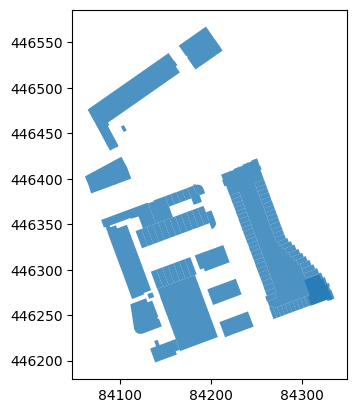

In [ ]:
plt.figure(figsize=(10, 6))
filtered_buildings.plot(legend=True, alpha=0.8) # Plain footprint
plt.show()

*Hint. Below you can find the code for:
- storing the created geopandas
- selecting a subset of buildings

This will be handy for the assignment!

In [ ]:
# Save the result (optional)
filtered_buildings.to_file("filtered_buildings.gpkg", layer="filtered_buildings", driver="GPKG")

In [ ]:
subset_buildings = filtered_buildings.iloc[0:50]  # Select first 50 buildings

subset_buildings

,b3_h_50p,b3_h_70p,b3_h_max,b3_h_min,b3_dd_id,identificatie,b3_pand_deel_id,b3_bag_bag_overlap,b3_n_vlakken,b3_pw_onvoldoende,...,theaterGemiddeldAantalBinnen5Km,theaterGemiddeldAantalBinnen10Km,theaterGemiddeldAantalBinnen20Km,gemiddeldeAfstandTotMuseum,gemiddeldAantalMuseaBinnen5Km,gemiddeldAantalMuseaBinnen10Km,gemiddeldAantalMuseaBinnen20Km,jrstatcode,jaar,fuuid
1091,14.028832,14.067258,16.910887,2.674834,0,NL.IMBAG.Pand.0503100000000172,0,0.000000,57,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1136,5.517914,5.556554,5.617487,5.420151,0,NL.IMBAG.Pand.0503100000018967,0,0.000000,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1137,12.508100,12.534971,12.603290,12.402353,0,NL.IMBAG.Pand.0503100000037147,0,0.000000,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1138,9.471802,9.483443,9.505923,9.438994,0,NL.IMBAG.Pand.0503100000037141,0,0.000000,2,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1139,9.483808,9.546851,9.646049,9.318042,0,NL.IMBAG.Pand.0503100000037118,0,0.000000,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1140,5.489552,5.528791,5.589256,5.389156,0,NL.IMBAG.Pand.0503100000027033,0,0.000000,2,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1141,9.471533,9.538936,9.661837,9.287775,0,NL.IMBAG.Pand.0503100000037123,0,0.000000,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1142,9.485486,9.532814,9.636203,9.333575,0,NL.IMBAG.Pand.0503100000037132,0,0.000000,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1143,9.511830,9.544086,9.628076,9.394943,0,NL.IMBAG.Pand.0503100000037146,0,0.000000,1,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76
1144,9.467106,9.539806,9.650938,9.284036,0,NL.IMBAG.Pand.0503100000037127,0,0.000000,2,false,...,2.0,6.8,48.0,1.8,5.0,8.0,58.0,2022BU05032402,2022,buurten.f995eee9-f2e3-469f-bee1-58f7c516fd76


### Retrieve geographical coordinates
You are now ready to store the geographical coordinates for a set of (50) buildings and stored them in a dictionary. Later on, you will reuse this dictionary to extract aerial images. Some new Python concepts here:
+ JSON: This package will help us to import and export lightweight files in a readable format.

<center>
<img src="https://drive.google.com/uc?export=view&id=1ROt1WTNbouo87IOveMPP5Fg2WnZS9Fb0" alt="floor-layout" class="center" width="650px">
</center>

Let's iterate over the subset of buildings we have collected and extract their geometry.

How can we iterate over rows?

- **`subset_buildings.iterrows()`** allows us to iterate over each row in the GeoDataFrame.
- **`row["identificatie"][14:]`** extracts a portion of the **building ID**, assuming the first 14 characters are not needed.
- **`row.geometry`** retrieves the **spatial geometry** associated with the building.
- Print the **building ID and geometry**, which can be useful for verification or debugging.

In [ ]:
for index, row in subset_buildings.iterrows():
    pand_id = row["identificatie"][14:]  # Replace with actual column name
    geometry = row.geometry  # Retrieves the geometry object

    print(f"Building: {pand_id}, Geometry: {geometry}")

Building: 0503100000000172, Geometry: MULTIPOLYGON (((84064.3438 446476.0938, 84064.2578 446476.0313, 84070.8125 446464.1563, 84070.7734 446464.125, 84070.8906 446463.9063, 84070.9766 446463.9688, 84071.7578 446462.5938, 84071.6172 446462.5, 84071.7891 446462.2188, 84071.9531 446462.2813, 84074.1641 446458.25, 84074.0078 446458.1563, 84074.2969 446457.6563, 84074.4531 446457.7188, 84076.6797 446453.5625, 84076.5781 446453.5313, 84076.7969 446453.125, 84076.8984 446453.1563, 84079.0469 446449.0938, 84079.2344 446448.75, 84081.375 446444.7188, 84081.2578 446444.625, 84081.4609 446444.3125, 84081.5703 446444.3438, 84083.7656 446440.2813, 84083.6406 446440.1875, 84083.8516 446439.8125, 84083.9766 446439.875, 84086.125 446435.8438, 84086 446435.7813, 84086.2422 446435.3438, 84086.3594 446435.4375, 84088.5469 446431.4375, 84088.4219 446431.375, 84088.6719 446430.9375, 84095.6328 446434.6875, 84095.8906 446434.1875, 84097.6016 446435.125, 84097.25 446435.7813, 84098.3516 446436.375, 84098.257

Let's store the information in a dictionary with:
- key: building's ID
- value: bounding box (footprint boundary)

#### Key Steps:
1. **Loop through each building (`subset_buildings`)**:
   - Retrieve the **building ID (`pand_id`)**.
   - Extract the **geometric footprint** (Polygon or MultiPolygon).
   - Convert the geometry into a NumPy array of **(x, y) coordinates**.

2. **Compute the Bounding Box**:
   - Find the **minimum and maximum** x and y coordinates.
   - Apply **additional padding (10 meters)** to include surrounding context.
   - Ensure the bounding box is a **square**, maintaining uniform dimensions.

3. **Store the Data**:
   - The **`build_coord`** dictionary is created with:
     - **Key**: Building ID
     - **Value**: List of bounding box coordinates `[xmin, ymin, xmax, ymax]`
   - Save the dictionary as a **JSON file** (`build_dic_.json`) for easy access.

In [ ]:
# Load Python modules
import numpy as np
import json
# import random
from shapely.geometry import MultiPolygon
'''
get coordinates for each building and stored them in a dictionary
    - Loop over BAG IDs
    - Extract coordinates
    - Compute bounding box
    - Store results
'''

additional_padding = 10 # let's add some context (note that this variable is defined in meters)


'''
Create a dictionary build_coord where:
- Key: building_index # Think of this like a building's passport ID
- Value: A list with a box coordinates that enclose the building footprint

To get the coordinates box, extract the coordinates from geopandas and find the 4 corners with basic min, max operations.
'''
build_coord = {}

for index, row in subset_buildings.iterrows():
    # Retrieve geographical coordinates from geopandas
    # coord = np.array(tile.geometry.iloc[i].exterior.coords)

    # Let's only collect the ID
    pand_id = row["identificatie"][14:]

    geometry = row.geometry  # Retrieve geometry (could be Polygon or MultiPolygon)
    if isinstance(geometry, MultiPolygon):  # Check if it's a MultiPolygon
        coords = [np.array(polygon.exterior.coords) for polygon in geometry.geoms]
    else:  # It's a single Polygon
        coords = [np.array(geometry.exterior.coords)]
    # Flatten the list if you need a single set of coordinates
    coord = np.vstack(coords)

    coord_box = []
    coord_box.append(coord[:,0].min() - additional_padding)
    coord_box.append(coord[:,1].min() - additional_padding)
    coord_box.append(coord[:,0].max() + additional_padding)
    coord_box.append(coord[:,1].max() + additional_padding)

    # Let's make sure the bounding box is a square
    sides = np.array((coord_box[2] - coord_box[0], coord_box[3] - coord_box[1]))
    index_max = np.argmax(sides)
    index_min = np.argmin(sides)
    increment = (sides[index_max]/2) - (sides[index_min]/2)
    coord_box[index_min] = coord_box[index_min] - increment
    coord_box[index_min+2] = coord_box[index_min+2] + increment

    # Add a dictionary item
    build_coord[pand_id] = coord_box

'''
As announced, let's store the dictionary as json file (very convenient!).
Note that:
- Filename is the string "build_dic.json"
- 'w' indicates that we are writing a text file
- .dump, well, speak by itself
'''
with open("build_dic_.json", 'w') as file_id:
    json.dump(build_coord, file_id)

In [ ]:
build_coord

{'0503100000000172': [84051.28515000001,
  446420.9375,
  84178.66015000001,
  446548.3125],
 '0503100000018967': [84165.03125, 446336.625, 84206.25004999997, 446377.8438],
 '0503100000037147': [84282.09379999997, 446246.4688, 84314.0625, 446278.4375],
 '0503100000037141': [84256.7813, 446237.125, 84288.7188, 446269.0625],
 '0503100000037118': [84215.6172,
  446352.08204999997,
  84247.4844,
  446383.94925],
 '0503100000027033': [84121.73045000002,
  446320.5625,
  84162.94924999999,
  446361.7813],
 '0503100000037123': [84223.7031, 446329.793, 84255.7109, 446361.80079999997],
 '0503100000037132': [84238.6094, 446288.9922, 84270.9063, 446321.2891],
 '0503100000037146': [84277.87109999999,
  446244.9063,
  84309.83980000002,
  446276.875],
 '0503100000037127': [84230.5156,
  446312.01170000003,
  84262.3672,
  446343.86329999997],
 '0503100000037128': [84231.9375,
  446307.58204999997,
  84263.9297,
  446339.57425],
 '0503100000027032': [84179.53514999998,
  446334.6563,
  84220.1288500

## Aerial images

### Automated aerial image collection
It is the perfect moment to switch gears, let's establish an automated process to extract aerial images via PDOK. The dictionary you created previously will be now very useful to define the contour of the image based on geographical coordinates.

<center>
<img src="https://drive.google.com/uc?export=view&id=1qSBDBTudubHXO6rddLbVAcMCCCqpOL58" alt="floor-layout" class="center" width="450px">
</center>


Extracting Aerial Images from a WMS Server

You will fetch high-resolution aerial images using the **Web Map Service (WMS)**. This is particularly useful for architectural analysis, urban planning, and site studies.

The function **`get_image`** retrieves an aerial image from the **PDOK WMS service**, given a specific **bounding box (bbox)**. Here’s how it works:

- The **bbox** defines the geographical area of interest.
- The image is requested with a **width and height**, ensuring clarity.
- The **coordinate reference system (CRS)** is set to **EPSG:28992**, the Dutch national coordinate system.
- The request is sent to the **PDOK WMS endpoint**, retrieving the image in **JPEG format**.
- If the request is successful, the image is saved locally.

This function allows you to extract **custom aerial imagery** that can be integrated into GIS applications or used for visual reference in architectural projects.


In [ ]:
## Extract image

import requests

def get_image(bbox, output_name, width=1200, height=1200):

  # Define the parameters for your request
  params = {
      "service": "WMS",
      "request": "GetMap",
      "layers": 'Actueel_orthoHR',
      "styles": '',
      "bbox": bbox,  # Bounding box parameters as a string
      "width": width,  # Image size in pixels
      "height": height,
      "crs": "EPSG:28992",  # Spatial reference system
      "format": "image/jpeg",
      "version": "1.3.0"  # Specify WMS version if needed
  }

  wms_url = 'https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0'

  # Make the GET request
  response = requests.get(wms_url, params=params)

  # Check if the request was successful
  if response.status_code == 200:
      # Save the image to a file
      with open(output_name + '.jpg', 'wb') as file:
          file.write(response.content)
      print(output_name, " downloaded successfully.")
  else:
      print("Error:", response.status_code, response.reason)

Downloading Aerial Images for Multiple Buildings

Now, you will automate the process of retrieving aerial images for multiple buildings. Instead of manually specifying a bounding box for each location, we iterate through the **dictionary of building coordinates (`build_coord`)**, where:

- Each **building ID (`build_id`)** is mapped to a set of **bounding box coordinates (`coords`)**.
- The **bounding box (bbox)** is formatted as a comma-separated string from the coordinate values.
- The function **`get_image`** is called to retrieve and store each aerial image in the `aerial_images/` folder, naming each file after the corresponding **building ID**.

📌 Make sure the specific folder exists in your GDrive (it does not have to be named `aerial_images/` necessarily.


In [ ]:
path_store_images = "aerial_images/"

for build_id, coords in build_coord.items():
  bbox = str(coords[0]) + ',' + str(coords[1]) + ',' + str(coords[2]) + ',' + str(coords[3])

  get_image(bbox, path_store_images + str(build_id))

aerial_images/0503100000000172  downloaded successfully.
aerial_images/0503100000018967  downloaded successfully.
aerial_images/0503100000037147  downloaded successfully.
aerial_images/0503100000037141  downloaded successfully.
aerial_images/0503100000037118  downloaded successfully.
aerial_images/0503100000027033  downloaded successfully.
aerial_images/0503100000037123  downloaded successfully.
aerial_images/0503100000037132  downloaded successfully.
aerial_images/0503100000037146  downloaded successfully.
aerial_images/0503100000037127  downloaded successfully.
aerial_images/0503100000037128  downloaded successfully.
aerial_images/0503100000027032  downloaded successfully.
aerial_images/0503100000023405  downloaded successfully.
aerial_images/0503100000031586  downloaded successfully.
aerial_images/0503100000037163  downloaded successfully.
aerial_images/0503100000037150  downloaded successfully.
aerial_images/0503100000001944  downloaded successfully.
aerial_images/0503100000037137 

In [ ]:
## Troubleshooting: what happens if the image aspect ratio is not respected?

build_id_b, coord_b = list(build_coord.items())[0] # We pick the first building from the list

bbox_b = str(coord_b[0]) + ',' + str(coord_b[1]) + ',' + str(coord_b[2]) + ',' + str(coord_b[3])
path_store_images_b = "tbd/"

get_image(bbox_b, path_store_images_b + str(build_id_b), 1000, 1200) # Note we are setting a different aspect ratio

tbd/0503100000000172  downloaded successfully.


## (Optional) Image visualization

### Viewing an Aerial Image

Once we have downloaded the aerial images, we can open and display them using **PIL (Pillow) and Matplotlib**. In this example:

- We specify the **image ID (`img_id`)** corresponding to a previously downloaded building image.
- The image is loaded from the **aerial_images/** folder using **`Image.open()`**.
- The image is then displayed using **Matplotlib (`plt.imshow()`)**.

This allows us to quickly **inspect the downloaded aerial imagery**, ensuring it is correctly retrieved and useful for further analysis.

*Try selecting different image IDs to visualize other locations!*

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

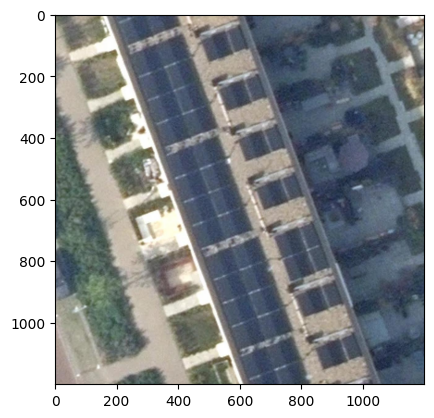

In [ ]:
# Open an image

path_store_images = "aerial_images/"
img_id = "0503100000037120"

img = Image.open(path_store_images + "/" + img_id + ".jpg")
# Assuming 'img' is your PIL image
plt.imshow(img)
# plt.axis('off')  # Hide axes
plt.show()

In [ ]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1200 at 0x7C48A83E6B50>


Converting an Image to an Array

To process the aerial image numerically, we convert it into a **NumPy array**. This allows us to analyze pixel values, apply image processing techniques, or integrate the image into machine learning models.

- **`np.array(img)`** transforms the image into a structured array of pixel values.
- **`print(img_array.shape)`** reveals the image’s dimensions in the format **(height, width, channels)**:
  - *Height* and *width* represent the image resolution.
  - *Channels* indicate color depth (e.g., 3 for RGB images).


In [ ]:
import numpy as np

# Image as an array
img_array = np.array(img)
print(img_array.shape)

(1200, 1200, 3)


In [ ]:
print(img_array)

[[[107 108 102]
  [108 109 103]
  [106 107 101]
  ...
  [255 252 254]
  [255 252 252]
  [255 252 252]]

 [[107 108 102]
  [109 110 104]
  [106 107 101]
  ...
  [255 252 254]
  [255 252 252]
  [255 252 252]]

 [[108 109 103]
  [110 111 105]
  [107 108 102]
  ...
  [255 253 254]
  [255 253 252]
  [255 253 252]]

 ...

 [[165 151 142]
  [165 151 142]
  [165 151 142]
  ...
  [ 82  98 121]
  [ 81  97 120]
  [ 80  96 119]]

 [[160 146 137]
  [161 147 138]
  [162 148 139]
  ...
  [ 85 101 124]
  [ 84 100 123]
  [ 83  99 122]]

 [[158 144 135]
  [159 145 136]
  [161 147 138]
  ...
  [ 86 102 125]
  [ 86 102 125]
  [ 85 101 124]]]


We define a function **`update_image`** that allows real-time modification of an aerial image’s **RGB color channels** using scaling factors. This can be useful for **visualization adjustments**.

#### How It Works:
- The function takes three parameters: **`red_factor`**, **`green_factor`**, and **`blue_factor`**, each controlling the intensity of the respective color channel.
- A **copy of the image array (`img_array`)** is created to avoid modifying the original.
- Each **RGB channel** is multiplied by its corresponding factor and clipped to **stay within the valid pixel range (0-255)**.
- The modified image is displayed using **Matplotlib (`plt.imshow()`)**.


In [ ]:
# Function to update the image based on slider values
def update_image(red_factor=1.0, green_factor=1.0, blue_factor=1.0):
    # Scale the RGB channels by slider values
    modified_image = img_array.copy()
    modified_image[:, :, 0] = np.clip(modified_image[:, :, 0] * red_factor, 0, 255)
    modified_image[:, :, 1] = np.clip(modified_image[:, :, 1] * green_factor, 0, 255)
    modified_image[:, :, 2] = np.clip(modified_image[:, :, 2] * blue_factor, 0, 255)

    # Display the updated image
    plt.figure(figsize=(6,6))
    plt.imshow(modified_image.astype(np.uint8))
    plt.axis("off")
    plt.show()

**Three sliders (`FloatSlider`)** allow real-time tuning of the **Red, Green, and Blue** intensities.
  - Each slider ranges from **0 (no color) to 2 (double intensity)**.
  - Default value is **1 (original image)**.
- The sliders are linked to the **`update_image`** function, which applies the adjustments dynamically.
- **`widgets.interactive`** ensures that moving the sliders **immediately updates** the displayed image.
- The **`display(interactive_plot)`** function renders the interactive controls.

In [ ]:
import ipywidgets as widgets

# Create interactive sliders
red_slider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description="Red")
green_slider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description="Green")
blue_slider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description="Blue")

# Link sliders to the function
interactive_plot = widgets.interactive(update_image, red_factor=red_slider, green_factor=green_slider, blue_factor=blue_slider)

# Display the widgets
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Red', max=2.0), FloatSlider(value=1.0, description='…

# Assignment: Collect a dataset with aerial images of buildings in a specific neighborhood.

- 2p: filter building data and select a subset of buildings within a neighborhood in Delft.
- 1p: spatially visualize an attribute for all buildings contained in your subset.
- 2p: create a dictionary with building footprint boundaries.
- 1p: the dictionary correctly contains building ids as keys and building boundaries as values
- 1p: extract the aerial images from building footprint boundaries.
- 1p: images are named based on their building id.
- 1p: clear and commented code.
- 1p: store the collected images into the global directory.

👉 You can download building and neighborhood data for the `Hof van Delft` district [here](https://drive.google.com/drive/folders/1r6RPCXV_DLK2EdQHnqhCL2oimnBZL_hM?usp=sharing)

### **Output**</br>
**Write your findings and interpretation in a notebook** named **"A4_footprints_photos_\<name\>.ipynb"**.

**Share the folder** containing the collected building aerial images.

! Please include the links pointing to the notebook and local folder when submitting the assignment on Brightspace.

## Assignment guidelines

#### Neighborhood
You will collect building aerial images from a specific neeighborhood within the `Hof van Delft` district, in Delft. Each group will deal with a specific neighborhood:

- Group 1: `Bedrijventerrein Altena`
- Group 2: `Agnetaparkbuurt`
- Group 3: `Ministersbuurt-West`
- Group 4: `Ministersbuurt-Oost`
- Group 5: `Westeindebuurt`
- Group 6: `Olofsbuurt`
- Group 7: `Krakeelpolder`
- Group 8: `Westerkwartier`

#### Subset
Coordinate with your group to decide the subset of buildings you will individually focus on.

#### Data storage
Place the aerial images and dictionary into a local folder.

# Additional topics

## JSON loading and unloading

You may need to load/unload JSON files in this tutorial/assignment. Please find some instructions below.

In [ ]:
# Don't forget to import json
import json

# Load a JSON file
with open('filename.json') as f:
    info_stored = json.load(f)

# Store a JSON file
with open('filename.json', 'w') as f: # Note we specify 'w' here
    json.dump(info_to_be_stored, f)